# The Quantum Repetition Code

In [1]:
from random import random
import numpy as np
from math import factorial
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib'

# The Classical Case
Consider a $1$-bit bitstring, $x$, sent from Alice to Bob across a binary symmetric channel that incurs a bitflip error with $\epsilon \ll 1$ probability.
To increase the probability that Bob will recieve $x$ correctly such that $\epsilon_L\lt \epsilon$, we can encode redundancy. We can a logical bit, $y$ that has $n=2m+1$ physical bits of redundancy:
$$x \rightarrow y=xx...x.$$
We choose $n$ to be odd such that we can use a simple majority function in decoding. Using $y$ by itself actually raises the probability of at least a single error occuring and scales by $n\epsilon$. If the goal is $\epsilon_L\lt \epsilon$, such reduncancy seems counterintuitive. So, for the codespace, $\mathcal{C}$, of $y$, we can define logical *codewords* for $y$ that represent $0$ and $1$ respectively:
$$0_L \rightarrow 00...0,$$
$$1_L \rightarrow 11...1. $$
If Bob recieves any message other than $0_L$ or $1_L$, he will know that an error has occured. These errors are *detectable*. If $n$ simultaneous bitflips occur, causing a sent $0_L$ codeword to erroneously become $1_L$ and vice versa, this error is *undetectable*. For Bob to get $x$ from the $y$ he recieved, he must use a decoder. In our repetition code, using a bitwise majority rule function to determine whether 
The code distance is defined by the minimum Hamming distance between codewords, 
$$d=\min_{x,y \in \mathcal{C}}|x-y|$$
where $x,y$ are binary vectors. We can deduce that for this code, $d=n$. 

### An Example
Alice wants to send the message $0$ across a noisy binary symmetric channel that has a bitflip error rate of $\epsilon=.2$.

In [69]:
message='0'
ERROR_RATE=.2

def binary_symmetric_channel(bitstr):
    channel_output=''
    for bit in bitstr: #Iterate over bitstring 
        if random()<=ERROR_RATE: 
            channel_output+= str(int(bit) ^ 1) #Equivalent to unsigned complement (bitflip)
        else: channel_output+=bit
    return channel_output
def hamming_weight(x:int):
    return x.bit_count()

def hamming_distance(x:str, y:str):
    """
        D(x,y)=|x-y|
    """
    return abs(hamming_weight(int(x,base=2)-int(y,base=2)))

recieved_message=binary_symmetric_channel(message)
print(f'Bob sent {message}, Alice recieved {recieved_message}')

Bob sent 0, Alice recieved 0


We can see that 

In [70]:
trials=10000
correct_transmissions=0
for i in range(trials): #Send the message over the channel many times
    recieved_message=binary_symmetric_channel(message)
    correct_transmissions+= hamming_distance(message, recieved_message)==0 #Tally every correct message transmission
accuracy=correct_transmissions/trials
print(f'Over {trials} trials, Alice sent the message to Bob correctly {accuracy} of the time.')

Over 10000 trials, Alice sent the message to Bob correctly 0.7969 of the time.


In [71]:
def encode(bitstr,n):
    encoded_message=''
    for bit in bitstr:
        encoded_message+=bit*n     
    return encoded_message #Clone unencoded message 
encoded_message=encode(message,3)
print(f'Alice encoded {message} to {encoded_message} and sent it to Bob across the channel.')

Alice encoded 0 to 000 and sent it to Bob across the channel.


In [72]:
def decode(encoded_message):
    encoded_message_hamming_weight=hamming_weight(int(encoded_message,base=2))
    majority=len(encoded_message)/2 
    #Simple majority rule decoding
    if encoded_message_hamming_weight>majority: return '1' 
    else: return '0'

trials=10000
correct_transmissions=0
for i in range(trials): #Send the message over the channel many times
    recieved_message=decode(binary_symmetric_channel(encoded_message)) #Decode recieved message
    correct_transmissions+= hamming_distance(message, recieved_message)==0 #Tally every correct message transmission
accuracy=correct_transmissions/trials
print(f'Alice sent the bit to Bob correctly with {accuracy} probability!')

Alice sent the bit to Bob correctly with 0.8926 probability!


Now, the logical bit will only flip if 2 or more physical bits are flipped. Thus, the error rate of the logical bit using a repetition code with $3$ physical bits is $$\epsilon_L=3\epsilon^2(1-\epsilon)+\epsilon^3= 3\epsilon^2-2\epsilon^3.$$ Given that $\epsilon \leq .5$, $\epsilon_L<\epsilon$! . Here, $.5$ is the code threshold with $\epsilon=\epsilon_L$; the  repetition code logical bit will have a lower error rate than the unencoded bit when the channel error rate is below threshold, and vice versa when greater than threshold. Generally, the $\epsilon_L$ for $n$-bit repetition code is 
$$\epsilon_L=\sum_{k=0}^{(n-1)/2} \frac{n!}{k!(n-k)!}\epsilon^{n-k}(1-\epsilon)^k.$$

This example code uses 3 bits, encodes 1 logical bit, and has codewords that are at minimum 3 Hamming distance, so it can be written as $[3,1,3]$ in $[n,k,d]$ notation. $\\$
Generally, the classical repetition code is $[n, 1, n]$. We can quickly see that this code is inefficient, this inefficiency can be shown by the *code rate*, which can be defined by $R=\frac{k}{d}$. For the repetition code, $R$ approaches $0$ for large $n$.

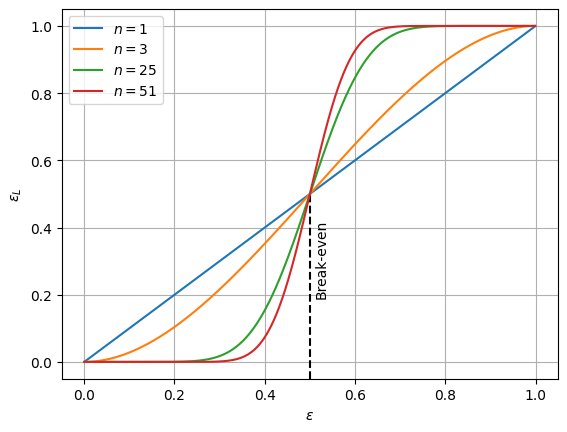

In [73]:
def logical_error_rate(n, epsilon):
    epsilon_logical=0
    for k in range(0, int((n-1)/2)+1): 
        epsilon_logical+=(factorial(n)/(factorial(k)*factorial(n-k)))*epsilon**(n-k)*(1-epsilon)**k
    return epsilon_logical

error_range=np.arange(0,1, .001)
plt.axvline(.5,0,.5, color='black', linestyle='--')
plt.plot(error_range, [logical_error_rate(1,x) for x in error_range], label=r'$n=1$')
plt.plot(error_range, [logical_error_rate(3,x) for x in error_range], label=r'$n=3$')
plt.plot(error_range, [logical_error_rate(25,x) for x in error_range], label=r'$n=25$')
plt.plot(error_range, [logical_error_rate(51,x) for x in error_range], label=r'$n=51$')
plt.legend(loc='upper left')
plt.text(.51, .2, 'Break-even', rotation=90, alpha=1)
plt.ylabel(r'$\epsilon_{L}$')
plt.xlabel(r'$\epsilon$')
plt.grid(True) 

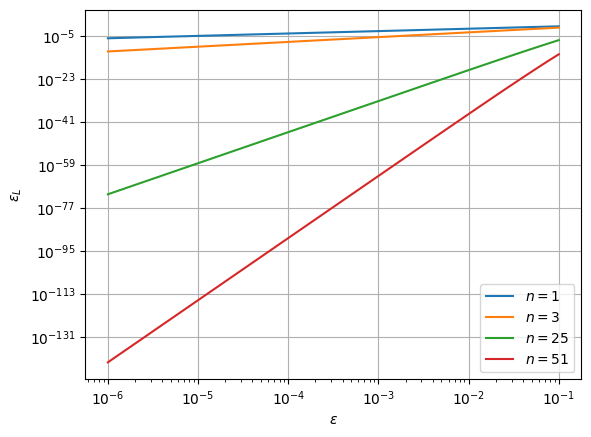

In [74]:
error_range=np.linspace(1e-6,1e-1, 100)
plt.plot(error_range, [logical_error_rate(1,x) for x in error_range], label=r'$n=1$')
plt.plot(error_range, [logical_error_rate(3,x) for x in error_range], label=r'$n=3$')
plt.plot(error_range, [logical_error_rate(25,x) for x in error_range], label=r'$n=25$')
plt.plot(error_range, [logical_error_rate(51,x) for x in error_range], label=r'$n=51$')
plt.legend(loc='lower right')
plt.ylabel(r'$\epsilon_{L}$')
plt.xlabel(r'$\epsilon$')
plt.yscale('log')
plt.xscale('log')
plt.grid(True) 

We can see that for large $n$, $\epsilon_L$ becomes asymptotal around the break-even point. And for a given $n$ repetition code, $\epsilon_L$ decreases linearly for decreasing $\epsilon$. To understand how much lower the logical error rate is than the physical, we can use *error correction gain*, defined by 
$$G=\frac{\epsilon}{\epsilon_L}.$$
For the repetition code, our gain is
$$G=\sum_{k=0}^{(n-1)/2}\frac{k! (n-k)!}{n!(1-\epsilon)^k }\epsilon^{1-n+k}.$$

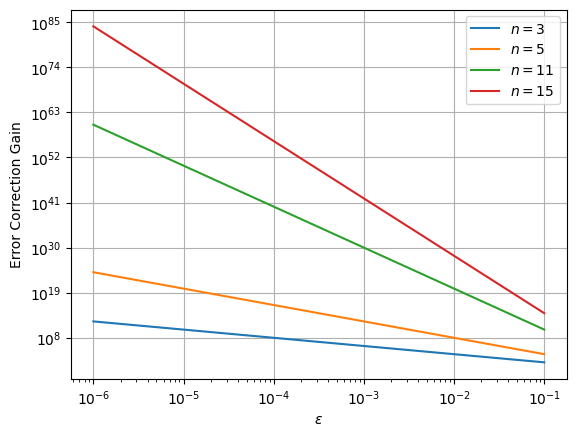

In [75]:
def logical_error_gain(n, epsilon):
    epsilon_logical=0
    for k in range(0, int((n-1)/2)+1): 
        epsilon_logical+=((factorial(k)*factorial(n-k))/(factorial(n)*(1-epsilon)**k))*epsilon**(1-n+k)
    return epsilon_logical

error_range=np.linspace(1e-6,1e-1, 100)
#plt.axvline(.5,0,.5, color='black', linestyle='--')
#plt.plot(error_range, [logical_error_rate(1,x) for x in error_range], label=r'$n=1$')
plt.plot(error_range, [logical_error_gain(3,x) for x in error_range], label=r'$n=3$')
plt.plot(error_range, [logical_error_gain(5,x) for x in error_range], label=r'$n=5$')
plt.plot(error_range, [logical_error_gain(11,x) for x in error_range], label=r'$n=11$')
plt.plot(error_range, [logical_error_gain(15,x) for x in error_range], label=r'$n=15$')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper right')
#plt.text(.51, .2, 'Break-even', rotation=90, alpha=1)
plt.ylabel(r'Error Correction Gain')
plt.xlabel(r'$\epsilon$') 
plt.grid(True)


# The Quantum Case
Consider a pure quantum state, $|\psi\rangle=\alpha|0\rangle +\beta|1\rangle, \ \alpha, \beta \in \mathbb{C}$. We can implement an $n$ qubit reduncy and encode $|\psi\rangle \rightarrow |\bar{\psi}\rangle=\alpha|0\rangle^{\otimes n}+\beta|1\rangle^{\otimes n}$. It is important to note that simply cloning $|\psi\rangle$ $n$ times would violate No Cloning Theorem, and thus $|\bar{\psi}\rangle \neq |\psi\rangle^{\otimes n}$. Instead, we can implement the redundancy with entanglement distribution via the $CNOT$ gate. 

<p align="left">
    <img src='bitflipcirc.png'/>
</p>

Fig. 1. $|\psi\rangle \rightarrow |\bar{\psi}\rangle$ encoding circuit with $3$ qubits. $\\$

Likewise to the classical repetition code, we use a odd number of $n$ qubits to encode $|\bar{\psi}\rangle$ so that we can use a simple majority function in decoding.

Since we cannot simply measure $|\bar{\psi}\rangle$ as this would destroy any superposition, we could do parity checks on qubits in $|\bar{\psi}\rangle$ using ancilla qubits!

<p align="left">
    <img src='paritycheck.png'/>
</p>

We can measure the ancilla qubits and determine their parity. The syndrome that we measure will allow us to determine where an error has occured.
| Syndrome | Error | Correction |
| --- | --- | --- |
| $00$ | No Error | $I\otimes I \otimes I $|
| $01$ | $\|\psi\rangle_0$ | $X \otimes I \otimes I$ |
| $10$ | $\|\psi\rangle_2$ | $I \otimes I \otimes X$ |
| $11$ | $\|\psi\rangle_1$ | $I \otimes X \otimes I$ |

In [135]:
from qutip import qeye, basis, tensor, sigmax, sigmay, sigmaz, Qobj, QobjEvo, fidelity
from qutip.qip.operations import snot,cnot, phasegate #S group
#Basis statevectors for qubit
ket0=basis(2,0) 
ket1=basis(2,1)

#Respective conjugate-transpose of the basis statevectors
bra0=ket0.trans()
bra1=ket1.trans()

psi=ket1
n=3

In [140]:
def encode(psi, n):
    distribution_unitary=cnot(n, control=n-2, target=n-1) 
    for j in np.arange(1,n-1): distribution_unitary*=cnot(n, control=n-j-2, target=n-j-1)
    logical_psi=distribution_unitary*tensor(psi, *[ket0 for _ in range(n-1)])#cnot(n, control=1, target=2)*cnot(n, control=0, target=1)*tensor(psi,ket0,ket0)
    return logical_psi
logical_psi=encode(psi,n)

$$|\bar{\psi}\rangle=\left( \prod_{j=1}^{n-1} \mathrm{CNOT}_{n-j-1, n-j} \right)\left(|\psi\rangle \otimes |0\rangle^{\otimes (n-1)}\right)=\alpha|0\rangle^{\otimes n}+\beta|1\rangle^{\otimes n}.$$
Likewise to the classical repetition code, we can define codewords for a $|0\rangle$ and $|1\rangle$ message:
$$|\bar{0}\rangle=|0\rangle^{\otimes n}, \ |\bar{1}\rangle=|1\rangle^{\otimes n}.$$
As before, the two codewords are $n$ Hamming distance apart. Encoding $1$ logical qubit, the quantum repetition code is thus an $[[n,1,n]]$ code. We use $[[n,k,d]]$ as opposed to $[n,k,d]$ to denote quantum codes. To decode, we first measure $|\bar{\psi}\rangle$


$$|\bar{\psi}\rangle=\mathrm{CNOT}_{1,2}\mathrm{CNOT}_{0,1}(|\psi\rangle \otimes |0\rangle \otimes |0\rangle)=\alpha|000\rangle + \beta|111\rangle.$$
Thus, we can encode the codewords as 
$$|\bar{0}\rangle=\mathrm{CNOT}_{1,2}\mathrm{CNOT}_{0,1}(|0\rangle \otimes |0\rangle \otimes |0\rangle)=|000\rangle,$$
$$|\bar{1}\rangle=\mathrm{CNOT}_{1,2}\mathrm{CNOT}_{0,1}(|1\rangle \otimes |0\rangle \otimes |0\rangle)=|111\rangle.$$

In [153]:
logical_psi.dag()*(tensor(sigmaz(),sigmaz(),sigmaz()))*logical_psi

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-1.]]

$$\hat{E}=\langle \bar{\psi} | Z^{\otimes n} | \bar{\psi} \rangle $$ 

In [155]:
psi=tensor(ket1, ket1, ket1)
psi.dag()*(tensor(sigmaz(),sigmaz(),sigmaz()))*psi

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-1.]]

A considerable weakness of the quantum repetition code is that it cannot detect phase errors. 


# Quantum Phase Repetition Code
While the quantum repetition code can only detect errors in the Pauli $Z$ basis, the quantum phase repetition code can only detect errors in the $X$ basis. Instead of measuring about the $Z$ basis, we measure about the $X$ basis.
$$|\bar{\psi}\rangle=\left( \prod_{j=1}^{n-1} \mathrm{CNOT}_{n-j-1, n-j} \right)\left(H|\psi\rangle \otimes |0\rangle^{\otimes (n-1)}\right)=\alpha|0\rangle^{\otimes n}+\beta|1\rangle^{\otimes n}.$$